# Algorithme d'intelligence artificiel

Base de donnée : dossier 2019, hash : 7812f3c2a5ab980c3d0041d97129e0b10e2926bb, fichier de base de donnée : database-2019, hash : 14991a36b6eac28953cd16ad0113803ee9e42c5a

In [2]:
from sklearn.model_selection import train_test_split
import tools
from checksumdir import dirhash
import hashlib
from confusion_matrix.confusion_matrix import plot_confusion_matrix_from_data

# hash directory : https://pypi.org/project/checksumdir/1.0.5/
directory = '../data/2019'
database = '../data/database-2019.csv'

sha1hashdir = dirhash(directory, 'sha1')
sha1hashfile = hashlib.sha1()

with open(database, 'rb') as f:
    while True:
        data = f.read()
        if not data:
            break
        sha1hashfile.update(data)

print(sha1hashdir)
print(sha1hashfile.hexdigest())

7812f3c2a5ab980c3d0041d97129e0b10e2926bb
14991a36b6eac28953cd16ad0113803ee9e42c5a


## Get and split Data

In [3]:
X, y = tools.getData(database, directory)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Nearest Neighbors

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

grid_params = {
    'n_neighbors': np.arange(1,20),
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid = GridSearchCV(KNeighborsClassifier(), grid_params, cv=5)
grid.fit(X_train, y_train)
model = grid.best_estimator_
print(grid.best_params_)
print(grid.best_score_)

{'algorithm': 'auto', 'metric': 'chebyshev', 'n_neighbors': 4}
0.7391452991452991


0.7719298245614035


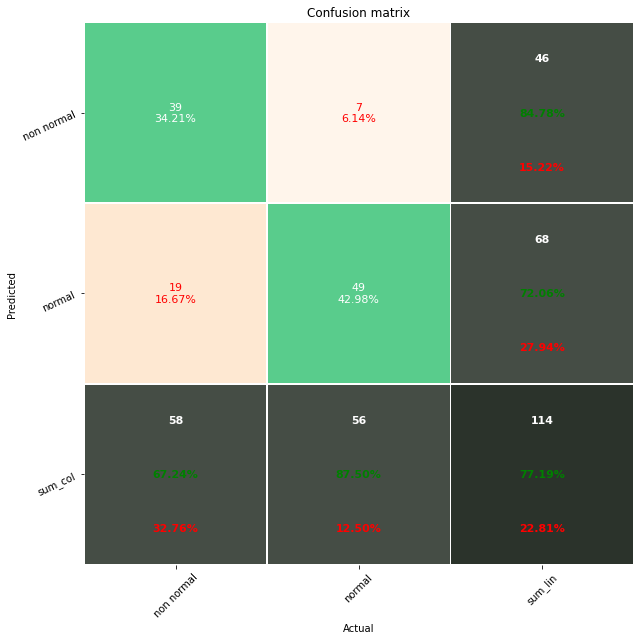

In [5]:
print(model.score(X_test, y_test))
predictions = model.predict(X_test)
plot_confusion_matrix_from_data(y_test, predictions,columns=['non normal','normal'])

In [6]:
from sklearn.metrics import classification_report
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=predictions
)
print(sk_report)

              precision    recall  f1-score   support

           0   0.847826  0.672414  0.750000        58
           1   0.720588  0.875000  0.790323        56

    accuracy                       0.771930       114
   macro avg   0.784207  0.773707  0.770161       114
weighted avg   0.785323  0.771930  0.769808       114



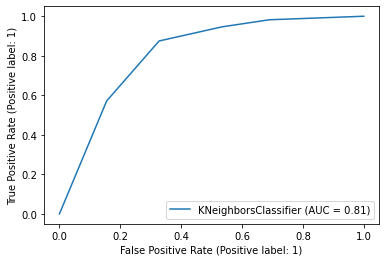

In [7]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X_test, y_test)